In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
market_data_scaled = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, index=market_data_df.index, columns=market_data_df.columns)

# Display the first 10 rows of the scaled DataFrame
market_data_scaled_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [7]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_scaled_df.index = market_data_df.index

# Display the first 10 rows of the scaled DataFrame
market_data_scaled_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set before importing scikit-learn

# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

# Create a list with the number of k-values to try (1 to 11)
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init to avoid warnings
    
    # Fit the model to the data using the scaled DataFrame
    kmeans.fit(market_data_scaled_df)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,54.739922
6,7,43.481606
7,8,37.517032
8,9,32.591891
9,10,28.222899


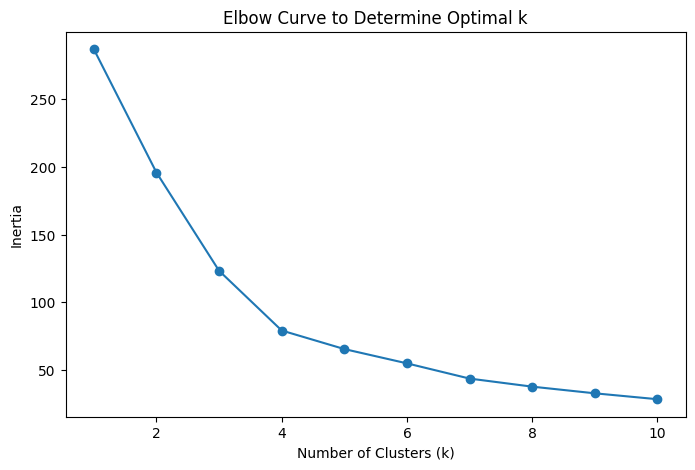

In [11]:
import matplotlib.pyplot as plt

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")

# Show the plot
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**  The best value for k is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [12]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, n_init=10, random_state=42)


In [13]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(market_data_scaled_df)


c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=42)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans_model.predict(market_data_scaled_df)

# View the resulting array of cluster values
cluster_predictions



array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [16]:
# Create a copy of the DataFrame
clustered_df = market_data_scaled_df.copy()



In [17]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["cluster"] = cluster_predictions

# Display the first 10 rows of the clustered DataFrame
clustered_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


<Figure size 800x500 with 0 Axes>

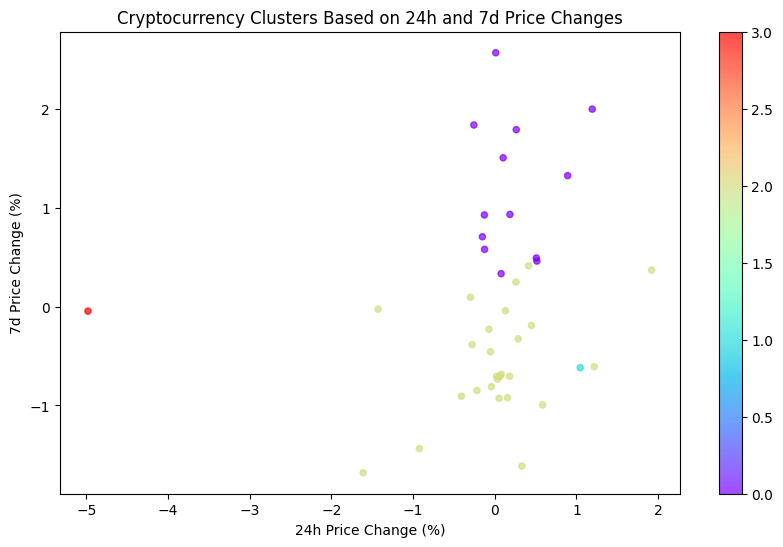

In [18]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8,5))
scatter = clustered_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=clustered_df["cluster"],  # Use cluster labels for color mapping
    colormap="rainbow",  # Use rainbow colormap
    alpha=0.7,  # Adjust transparency for better visibility
    figsize=(10,6)
)

# Add title and labels
plt.title("Cryptocurrency Clusters Based on 24h and 7d Price Changes")
plt.xlabel("24h Price Change (%)")
plt.ylabel("7d Price Change (%)")

# Show the plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [19]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)


In [21]:
# Use the PCA model to transform the original scaled data
pca_data = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the transformed PCA data
pca_data[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [22]:
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance



array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.895 (or 89.5%).

In [23]:
# Creating a DataFrame with the PCA data
pca_columns = ["PCA1", "PCA2", "PCA3"]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Copy the crypto names from the original data
pca_df.index = market_data_scaled_df.index  # Retain the coin_id index

# Display the first 10 rows of the PCA DataFrame
pca_df.head(10)



,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try (1 to 11)
k_values_pca = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # Create a KMeans model with k clusters
    kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Fit the model to the data using the PCA DataFrame
    kmeans_pca.fit(pca_df)
    
    # Append the inertia value to the list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values_pca, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca



c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,30.777746
6,7,21.134056
7,8,17.091637
8,9,13.681140
9,10,10.630648


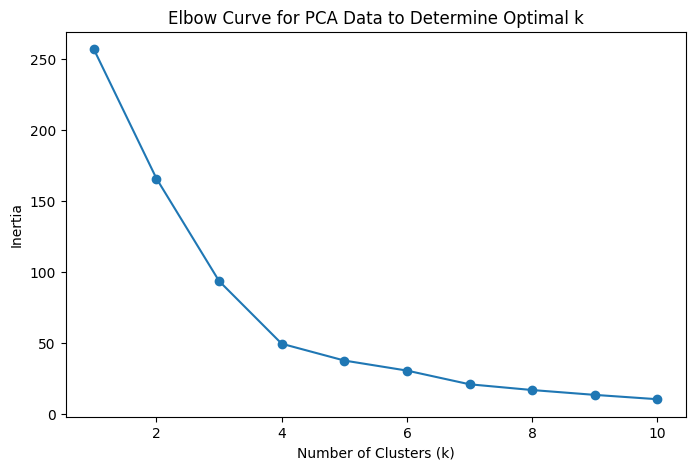

In [25]:
import matplotlib.pyplot as plt

# Plot the Elbow Curve for PCA data
plt.figure(figsize=(8,5))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for PCA Data to Determine Optimal k")

# Show the plot
plt.show()



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4, based on the elbow point observed in the Elbow Curve plotted from the PCA-transformed data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value remains 4, which is consistent with the original scaled data. This suggests that PCA retained the essential clustering structure while reducing the number of dimensions.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
kmeans_pca_model = KMeans(n_clusters=4, n_init=10, random_state=42)



In [27]:
# Fit the K-Means model using the PCA data
kmeans_pca_model.fit(pca_df)



c:\Users\250wa\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=10, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_predictions = kmeans_pca_model.predict(pca_df)

# Print the resulting array of cluster values
print(pca_cluster_predictions)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [29]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df["crypto_cluster"] = pca_cluster_predictions

# Display the first 10 rows of the clustered PCA DataFrame
pca_clustered_df.head(10)



,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


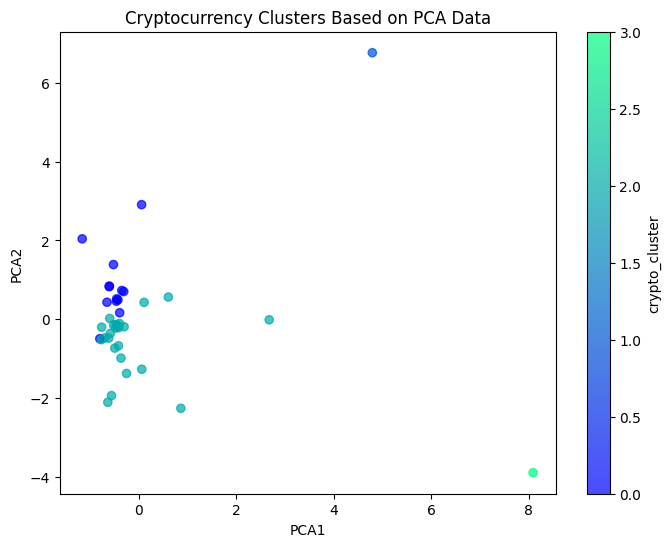

In [30]:
import matplotlib.pyplot as plt

# Create a scatter plot using PCA1 and PCA2
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    pca_clustered_df["PCA1"], 
    pca_clustered_df["PCA2"], 
    c=pca_clustered_df["crypto_cluster"], 
    cmap="winter",  # Adjust colormap for visibility
    alpha=0.7  # Transparency for better readability
)

# Add color bar to indicate clusters
plt.colorbar(label="crypto_cluster")

# Add labels and title
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Cryptocurrency Clusters Based on PCA Data")

# Show the plot
plt.show()



### Determine the Weights of Each Feature on each Principal Component

In [31]:
# Use the columns from the original scaled DataFrame as the index
pca_components_df = pd.DataFrame(
    pca.components_,  # Extract principal component weights
    columns=market_data_scaled_df.columns,  # Set columns from original scaled data
    index=["PCA1", "PCA2", "PCA3"]  # Naming the principal components
)

# Display the DataFrame
pca_components_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PCA1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PCA2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PCA3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The features with the strongest positive influence on each principal component are: 
price_change_percentage_200d for PCA1, price_change_percentage_7d for PCA2, and price_change_percentage_14d for PCA3. 
The features with the strongest negative influence are: price_change_percentage_24h for PCA1, price_change_percentage_60d for PCA2, and price_change_percentage_30d for PCA3. 
These features contribute the most to the variance captured by each principal component.
    